In [1]:
import glob
import os
import pickle as pkl
import re
import sys

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

### Data Preprocessing

In [2]:
with open('khaz_useful.pkl', "rb") as f:
    khaz_db = pkl.load(f)

In [3]:
khaz_db

label,ID,Title,Natoms,Ntypes,Volume of Cell,"Band Gap, PBE","Band Gap, HSE06","Band Gap, Experimental",Dielectric Constant,"Dielectric Constant, Electronic",...,Density,Magnetization,Spontaneous Polarization,Refractive Index,Decomposition Energy,Formation Energy,Ionization Energy,Electron Affinity,Shear Modulus,Cohesive Energy
units,NaN,NaN,NaN,NaN,(Å3),(eV),(eV),(eV),NaN,NaN,...,(g/cm3),(μB),(μC/cm2),NaN,(eV),(eV),(eV),(eV),(GPa),(eV/atom)
1,1245.0,CH6I3NSn,12.0,5.0,NaN,0.2,1.22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1246.0,CH6I3NSn,12.0,5.0,NaN,1.3,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1247.0,SnI3NH4,9.0,4.0,NaN,0.4,1.65,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1248.0,SnI3NH4,9.0,4.0,NaN,1.9,3.05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1249.0,CH5I3N2Sn,12.0,5.0,NaN,0.2,1.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,3192.0,C3H5N2PbI3,14.0,5.0,285.78,1.53,2.35,NaN,43.32,5.20,...,3.82,NaN,NaN,2.28,NaN,0.41,NaN,NaN,NaN,NaN
2691,3193.0,C3H5N2PbI3,14.0,5.0,285.83,1.55,2.39,NaN,72.69,5.25,...,3.82,NaN,NaN,2.29,NaN,0.41,NaN,NaN,NaN,NaN
2693,3194.0,C3H5N2PbI3,14.0,5.0,285.67,1.69,2.51,NaN,28.55,5.17,...,3.82,NaN,NaN,2.27,NaN,0.41,NaN,NaN,NaN,NaN


In [4]:
keep_idxs = khaz_db[['Title', 'Band Gap, HSE06', 'Dielectric Constant, Electronic']].dropna(axis=0, how='any').index

In [5]:
khaz_ordered = khaz_db.loc[keep_idxs].reset_index(drop=True)
khaz_ordered

label,ID,Title,Natoms,Ntypes,Volume of Cell,"Band Gap, PBE","Band Gap, HSE06","Band Gap, Experimental",Dielectric Constant,"Dielectric Constant, Electronic",...,Density,Magnetization,Spontaneous Polarization,Refractive Index,Decomposition Energy,Formation Energy,Ionization Energy,Electron Affinity,Shear Modulus,Cohesive Energy
units,NaN,NaN,NaN,NaN,(Å3),(eV),(eV),(eV),NaN,NaN,...,(g/cm3),(μB),(μC/cm2),NaN,(eV),(eV),(eV),(eV),(GPa),(eV/atom)
0,1851.0,C2H8NGeF3,15.0,5.0,113.76,4.73,5.94,NaN,5.40,2.80,...,2.56,NaN,NaN,1.67,NaN,-0.23,NaN,NaN,NaN,NaN
1,1852.0,C2H8NGeF3,15.0,5.0,113.87,4.1,5.37,NaN,5.61,2.88,...,2.56,NaN,NaN,1.70,NaN,-0.23,NaN,NaN,NaN,NaN
2,1853.0,C2H8NGeF3,15.0,5.0,118.14,4.59,5.89,NaN,6.11,2.74,...,2.47,NaN,NaN,1.65,NaN,-0.21,NaN,NaN,NaN,NaN
3,1854.0,C2H8NGeF3,15.0,5.0,117.07,4.67,5.95,NaN,5.30,2.73,...,2.49,NaN,NaN,1.65,NaN,-0.23,NaN,NaN,NaN,NaN
4,1855.0,C2H8NGeF3,15.0,5.0,116.03,4.66,5.96,NaN,4.96,2.75,...,2.51,NaN,NaN,1.66,NaN,-0.21,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,3192.0,C3H5N2PbI3,14.0,5.0,285.78,1.53,2.35,NaN,43.32,5.20,...,3.82,NaN,NaN,2.28,NaN,0.41,NaN,NaN,NaN,NaN
1342,3193.0,C3H5N2PbI3,14.0,5.0,285.83,1.55,2.39,NaN,72.69,5.25,...,3.82,NaN,NaN,2.29,NaN,0.41,NaN,NaN,NaN,NaN
1343,3194.0,C3H5N2PbI3,14.0,5.0,285.67,1.69,2.51,NaN,28.55,5.17,...,3.82,NaN,NaN,2.27,NaN,0.41,NaN,NaN,NaN,NaN


In [6]:
khaz_ordered.dropna(axis=1, how='any')
features = ['Atomization Energy',
    'Volume of Cell', 'Density', 'Formation Energy']
band_gap = ['Band Gap, PBE']

In [7]:
with open('../../datasets/df_mbtr.pkl', "rb") as f:
    mbtrs = pkl.load(f)

In [8]:
mbtr_colnums = mbtrs.columns

In [9]:
mbtr_cols = [f"mbtr_{i}" for i in mbtr_colnums]
mbtr_cols
mbtrs.columns = pd.MultiIndex.from_arrays([mbtr_cols, [pd.NA]*len(mbtr_cols)], names=["label", "units"])

In [10]:
mbtrs

label,mbtr_0,mbtr_1,mbtr_2,mbtr_3,mbtr_4,mbtr_5,mbtr_6,mbtr_7,mbtr_8,mbtr_9,...,mbtr_3290,mbtr_3291,mbtr_3292,mbtr_3293,mbtr_3294,mbtr_3295,mbtr_3296,mbtr_3297,mbtr_3298,mbtr_3299
units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,0.0,0.0,0.0,0.0,0.0,4.508058e-07,0.000106,0.007618,0.184392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,4.654385e-07,0.000112,0.008003,0.194119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,4.289701e-07,0.000097,0.006808,0.162782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,5.472411e-07,0.000122,0.008227,0.184881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,6.532356e-07,0.000139,0.009132,0.199871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,0.0,0.0,0.0,0.0,0.0,0.0,1.089588e-07,0.000025,0.001758,0.039228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1342,0.0,0.0,0.0,0.0,0.0,0.0,1.090668e-07,0.000025,0.001792,0.040009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1343,0.0,0.0,0.0,0.0,0.0,0.0,1.215517e-07,0.000026,0.001860,0.041288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
all_feature_df = pd.concat([khaz_ordered, mbtrs], axis=1)
all_feature_df

label,ID,Title,Natoms,Ntypes,Volume of Cell,"Band Gap, PBE","Band Gap, HSE06","Band Gap, Experimental",Dielectric Constant,"Dielectric Constant, Electronic",...,mbtr_3290,mbtr_3291,mbtr_3292,mbtr_3293,mbtr_3294,mbtr_3295,mbtr_3296,mbtr_3297,mbtr_3298,mbtr_3299
units,NaN,NaN,NaN,NaN,(Å3),(eV),(eV),(eV),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1851.0,C2H8NGeF3,15.0,5.0,113.76,4.73,5.94,NaN,5.40,2.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1852.0,C2H8NGeF3,15.0,5.0,113.87,4.1,5.37,NaN,5.61,2.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1853.0,C2H8NGeF3,15.0,5.0,118.14,4.59,5.89,NaN,6.11,2.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1854.0,C2H8NGeF3,15.0,5.0,117.07,4.67,5.95,NaN,5.30,2.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1855.0,C2H8NGeF3,15.0,5.0,116.03,4.66,5.96,NaN,4.96,2.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,3192.0,C3H5N2PbI3,14.0,5.0,285.78,1.53,2.35,NaN,43.32,5.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1342,3193.0,C3H5N2PbI3,14.0,5.0,285.83,1.55,2.39,NaN,72.69,5.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1343,3194.0,C3H5N2PbI3,14.0,5.0,285.67,1.69,2.51,NaN,28.55,5.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
with open("khaz_full_features.pkl", "wb") as wf:
    pkl.dump(all_feature_df, wf)

In [13]:
all_X = all_feature_df.to_numpy()

In [14]:
mbtrs_X = mbtrs.to_numpy()
mbtrs_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
with open("../../datasets/khazana/eb_i.pkl", "rb") as rf:
    all_Y = pkl.load(rf)

In [16]:
len(all_Y)

1346

### Ionic Data Lasso

In [17]:
from sklearn import linear_model
from sklearn import model_selection

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    mbtrs_X, all_Y, test_size=0.2, random_state=69)

In [20]:
reg = linear_model.LassoCV()
reg.fit(X_train, y_train)

/home/apeng/mambaforge/envs/ssmcdat/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.538e-01, tolerance: 1.012e-01
  model = cd_fast.enet_coordinate_descent(
/home/apeng/mambaforge/envs/ssmcdat/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.462e-01, tolerance: 1.012e-01
  model = cd_fast.enet_coordinate_descent(
/home/apeng/mambaforge/envs/ssmcdat/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

LassoCV()

In [28]:
lasso_rsq = reg.score(X_test, y_test)
lasso_rsq

0.851367276583277

In [22]:
with open("lasso_model.pkl", "wb") as f:
    pkl.dump(reg, f)

In [51]:
plt.rcParams.update({'xtick.minor.visible': True,
                     'ytick.minor.visible': True,
                     'lines.marker': '.',
                     'lines.markersize': 8}
                   )
plt.rcParams.update({'figure.autolayout':False})
use_tex = True ## set to false if formatting issues
plt.rcParams.update({'text.usetex':use_tex,
                     'axes.titlesize':18})
plt.rcParams.update({'font.size':18})
plt.rcParams['figure.figsize'] = [9, 6]

In [52]:
len(y_train)

1076

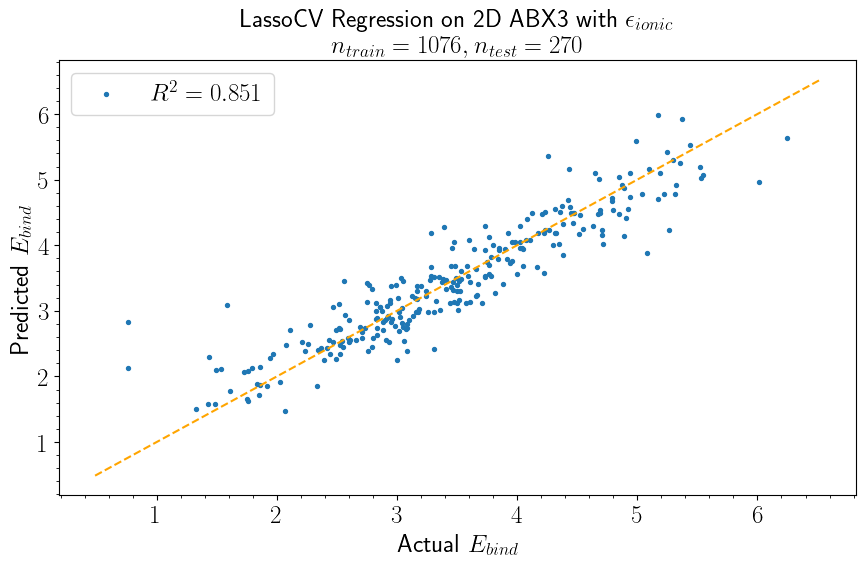

In [53]:
f, ax = plt.subplots(tight_layout=True)
ax.scatter(y_test, reg.predict(X_test), s=8, label=f'$R^2 = {round(lasso_rsq, 3)}$')
xmin, xmax = ax.get_xlim()
xrange = np.linspace(xmin, xmax)
ax.plot(xrange, xrange, '--', c='orange')
ax.set_xlabel(r"Actual $E_{bind}$")
ax.set_ylabel(r"Predicted $E_{bind}$")
ax.set_title("LassoCV Regression on 2D ABX3 with $\epsilon_{ionic}$\n $n_{train} = 1076 ,n_{test}=270$")
ax.legend()
plt.savefig("Lasso_khazana_2d_abx3_ionic.png")
plt.show()

### Electronic Data

In [54]:
elec_labels = pd.read_csv('../../datasets/khazana/khazana_electronic.csv')
elec_labels

,Unnamed: 0,Title,"Band Gap, HSE06","Dielectric Constant, Electronic",EBE
0,7,C2H8NGeF3,5.94,2.80,4.877395
1,9,C2H8NGeF3,5.37,2.88,4.365609
2,11,C2H8NGeF3,5.89,2.74,4.780348
3,13,C2H8NGeF3,5.95,2.73,4.832204
4,15,C2H8NGeF3,5.96,2.75,4.858403
...,...,...,...,...,...
1341,2689,C3H5N2PbI3,2.35,5.20,2.041907
1342,2691,C3H5N2PbI3,2.39,5.25,2.087748
1343,2693,C3H5N2PbI3,2.51,5.17,2.198321
1344,2695,C3H5N2PbI3,3.10,4.52,2.692234


In [62]:
X_elec_train, X_elec_test, y_elec_train, y_elec_test = model_selection.train_test_split(
                                            mbtrs_X, elec_labels["EBE"], test_size=0.2, random_state=69)

In [63]:
reg_elec = linear_model.LassoCV()
reg_elec.fit(X_elec_train, y_elec_train)

/home/apeng/mambaforge/envs/ssmcdat/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.563e-02, tolerance: 6.430e-02
  model = cd_fast.enet_coordinate_descent(
/home/apeng/mambaforge/envs/ssmcdat/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.217e-01, tolerance: 6.430e-02
  model = cd_fast.enet_coordinate_descent(
/home/apeng/mambaforge/envs/ssmcdat/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

LassoCV()

In [64]:
lasso_elec_rsq = reg_elec.score(X_elec_test, y_elec_test)
lasso_elec_rsq

0.929091351643921

In [65]:
len(y_elec_test)

270

In [66]:
len(y_elec_train)

1076

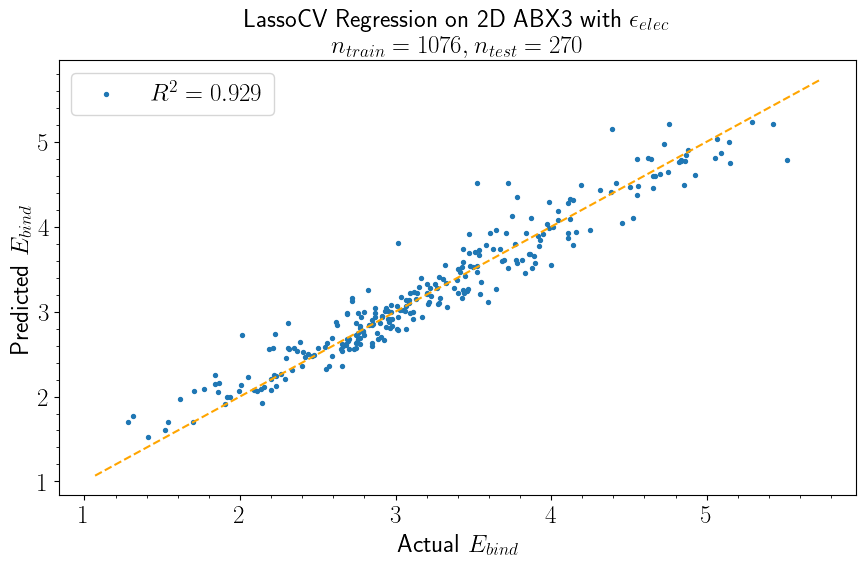

In [67]:
f, ax = plt.subplots(tight_layout=True)
ax.scatter(y_elec_test, reg_elec.predict(X_elec_test), s=8, label=f'$R^2 = {round(lasso_elec_rsq, 3)}$')
xmin, xmax = ax.get_xlim()
xrange = np.linspace(xmin, xmax)
ax.plot(xrange, xrange, '--', c='orange')
ax.set_xlabel(r"Actual $E_{bind}$")
ax.set_ylabel(r"Predicted $E_{bind}$")
ax.set_title("LassoCV Regression on 2D ABX3 with $\epsilon_{elec}$\n $n_{train} = 1076 ,n_{test}=270$")
ax.legend()
plt.savefig("Lasso_khazana_2d_abx3_electronic.png")
plt.show()

In [38]:
from sklearn import preprocessing

In [39]:
scaler = preprocessing.StandardScaler()
#y_train_normal = scaler.fit_ransform(y_train)
#_test_normal = scaler.fit_transform(y_test)
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [40]:
reg_norm = linear_model.LassoCV(verbose=False)
reg_norm.fit(X_train_norm, y=y_train)

/home/apeng/mambaforge/envs/ssmcdat/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.379e-01, tolerance: 1.012e-01
  model = cd_fast.enet_coordinate_descent(
/home/apeng/mambaforge/envs/ssmcdat/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.372e-01, tolerance: 1.012e-01
  model = cd_fast.enet_coordinate_descent(
/home/apeng/mambaforge/envs/ssmcdat/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

LassoCV()

In [41]:
r_sq_normed = reg_norm.score(X_test, y_test)
r_sq_normed

-2.5691982126849293